### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

### Import Dataset

In [212]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Melihat informasi Dataset

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Mengecek nilai yang hilang pada dataset

In [214]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Mengecek nilai yang duplikat pada dataset

In [215]:
df.duplicated().sum()

0

### Melihat statistik untuk menentukan karakteristik data

In [216]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Melihat persebaran data pada kolom numerik

In [217]:
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

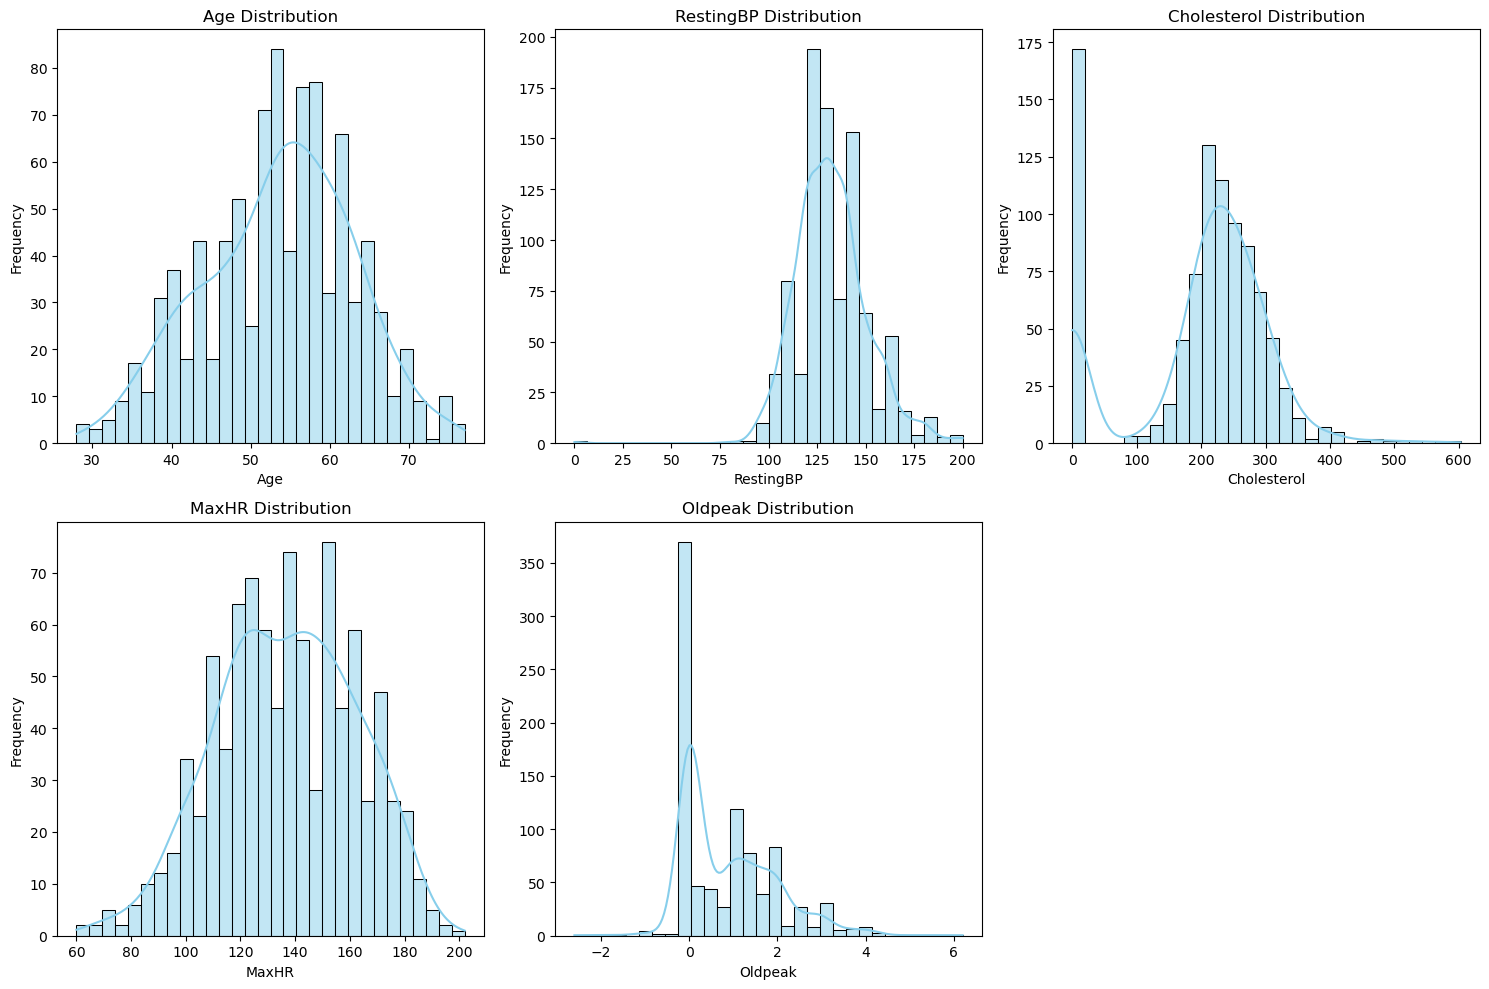

In [218]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1) 
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

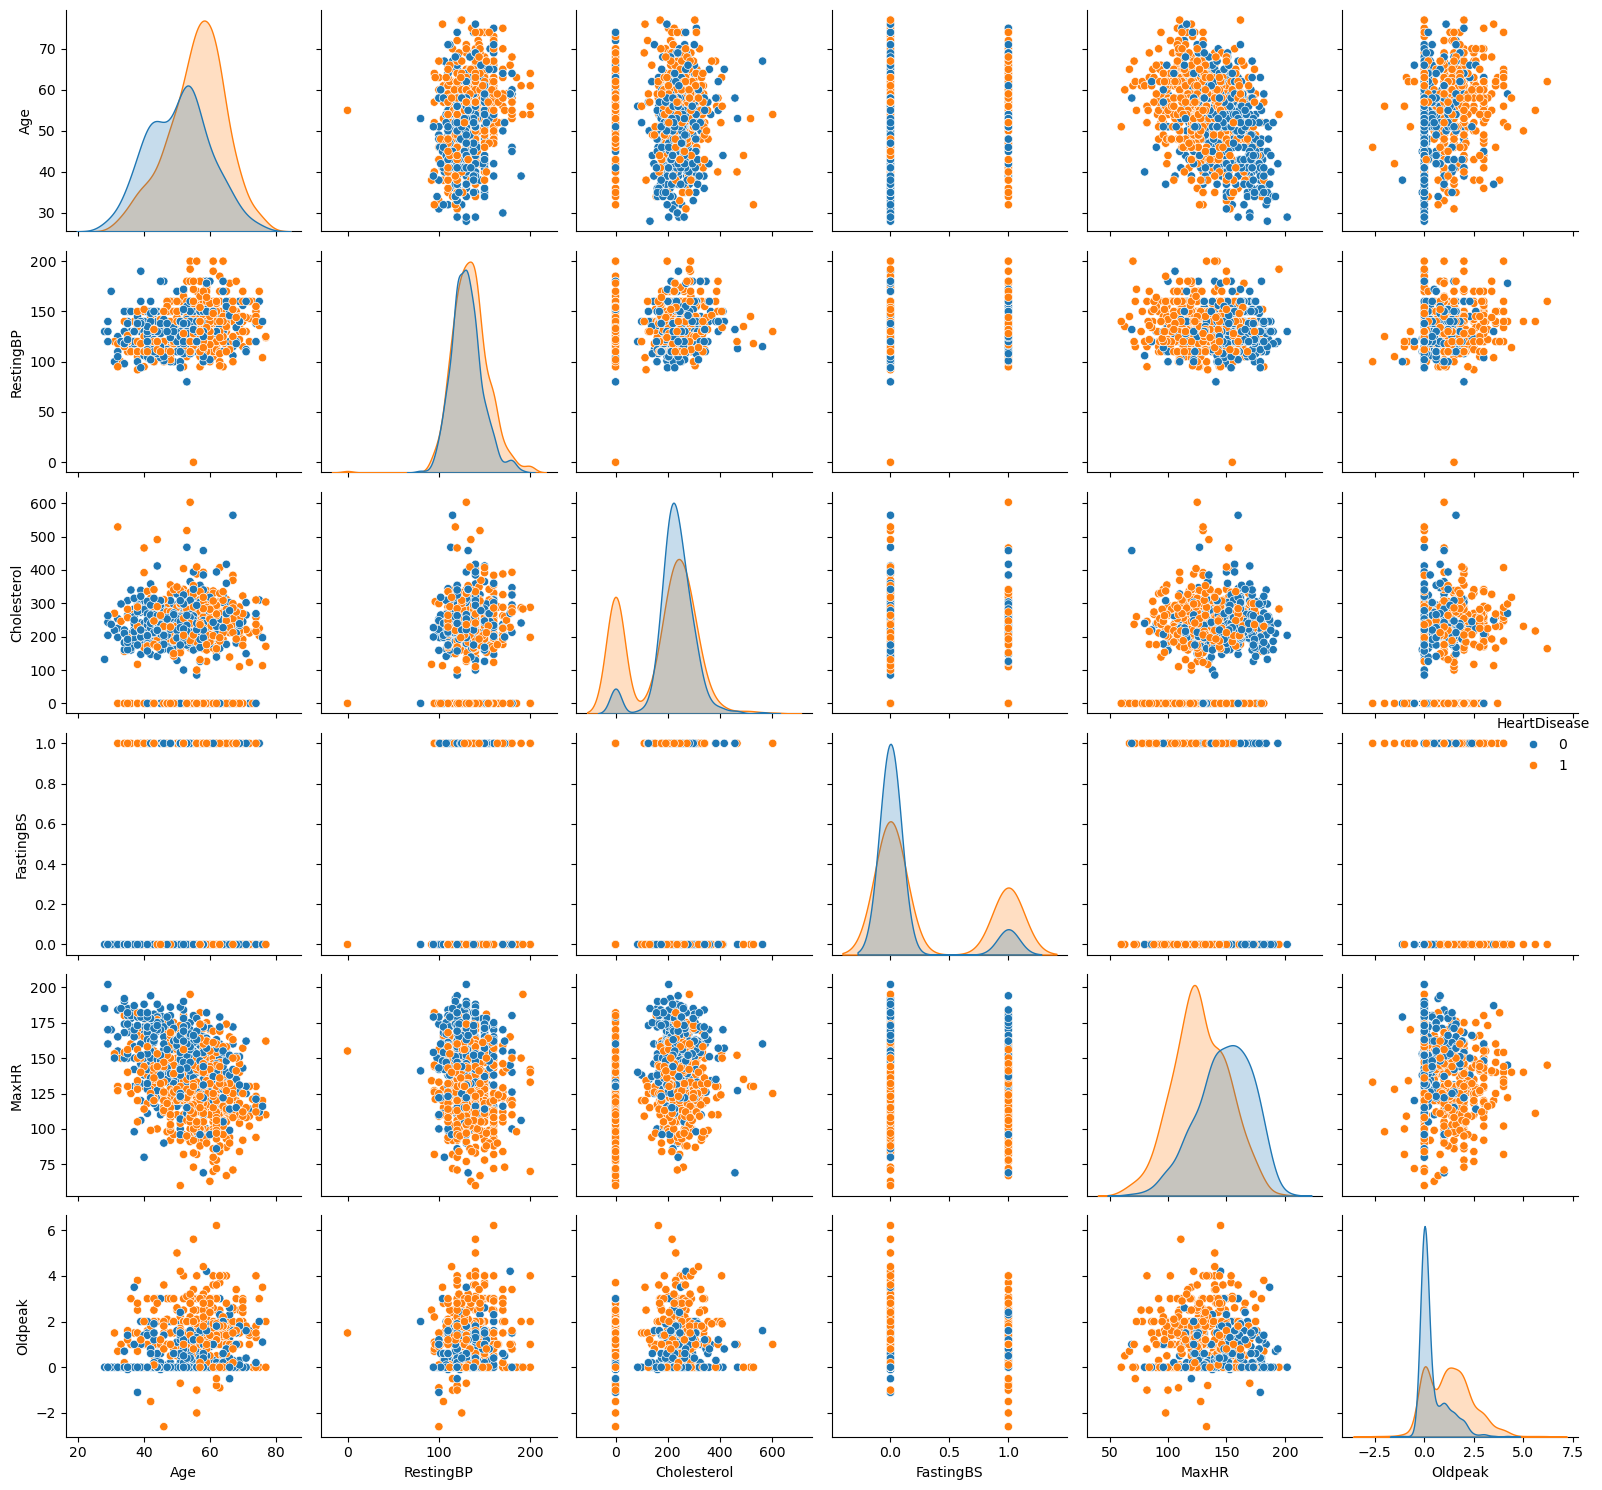

In [219]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='HeartDisease', diag_kind='kde')
plt.tight_layout()
plt.show()

### Melihat outlier dan membersihkan outlier apabila diperlukan

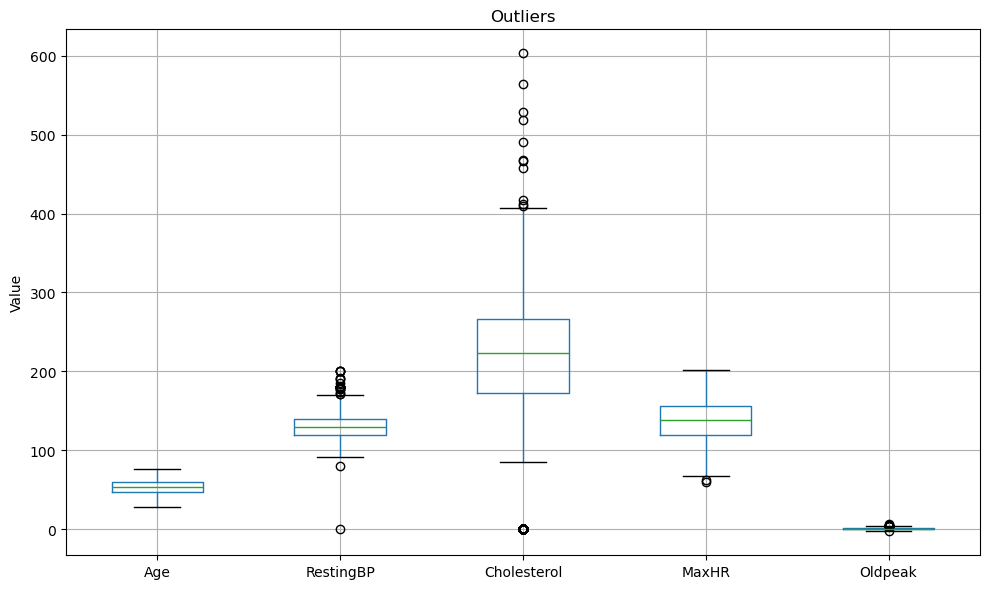

In [220]:
df[numeric_cols].boxplot(figsize=(10, 6))
plt.title('Outliers')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [221]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### Melakukan encoding pada data kategorikal

In [222]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             701 non-null    int64  
 1   Sex             701 non-null    int32  
 2   ChestPainType   701 non-null    int32  
 3   RestingBP       701 non-null    int64  
 4   Cholesterol     701 non-null    int64  
 5   FastingBS       701 non-null    int64  
 6   RestingECG      701 non-null    int32  
 7   MaxHR           701 non-null    int64  
 8   ExerciseAngina  701 non-null    int32  
 9   Oldpeak         701 non-null    float64
 10  ST_Slope        701 non-null    int32  
 11  HeartDisease    701 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 57.5 KB


In [223]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### Melakukan scaling pada data numerik

In [224]:
ss = StandardScaler()
df[numeric_cols] = ss.fit_transform(df[numeric_cols])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.334331,1,1,0.548422,0.984547,0,1,1.290461,0,-0.864955,2,0
1,-0.390470,0,2,1.845686,-1.182352,0,1,0.633456,0,0.178110,1,1
2,-1.648952,1,1,-0.100209,0.865268,0,2,-1.748185,0,-0.864955,2,0
3,-0.495344,0,0,0.418696,-0.506439,0,1,-1.337557,1,0.699642,1,1
4,0.133897,1,2,1.197054,-0.884155,0,1,-0.762678,0,-0.864955,2,0


### Melihat korelasi antar fitur

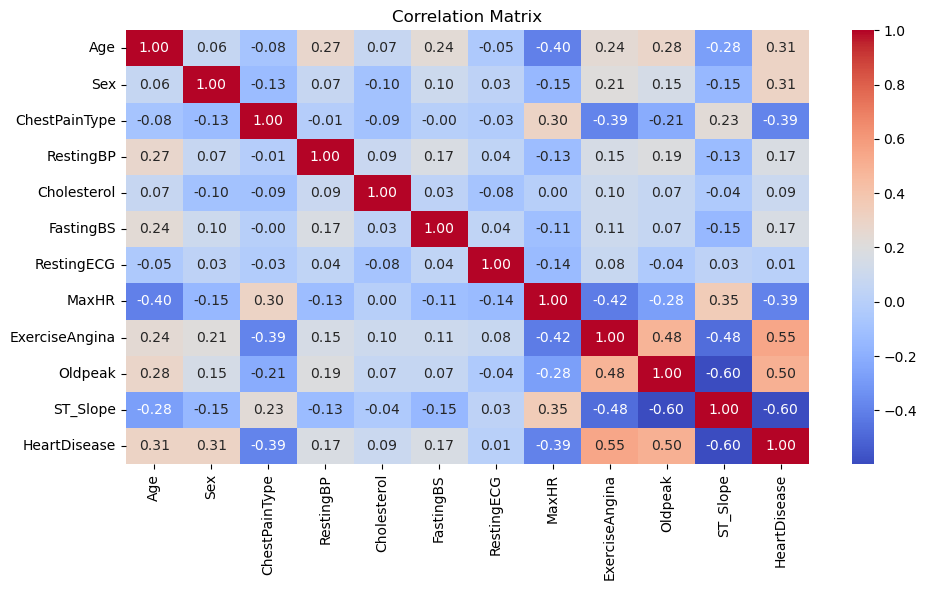

In [225]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Melakukan reduksi dimensi pada fitur menggunakan PCA

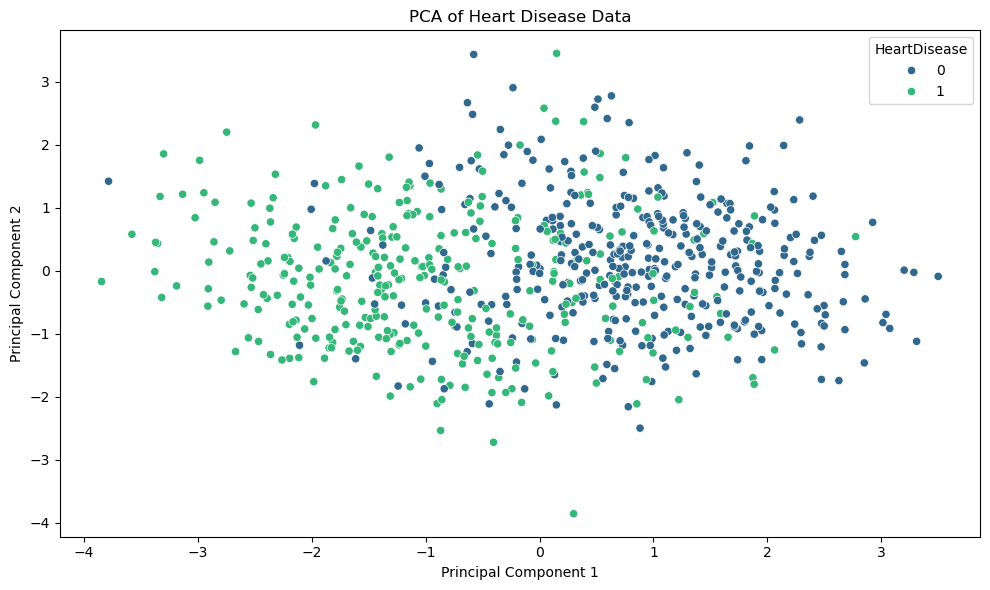

In [226]:
pca = PCA(n_components=2)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('PCA of Heart Disease Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Menggunakan GridSearchCV untuk menetapkan hyperparameter terbaik pada model

In [227]:
param_grid = {
    'var_smoothing': np.logspace(-12, -1, 12)
}

grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_pca, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

cv_results = grid_search.cv_results_

Best Parameters: {'var_smoothing': 0.001}
Best Cross-Validated Score: 0.8074468085106383


In [228]:
best_param = grid_search.best_params_['var_smoothing']
model = GaussianNB(var_smoothing=best_param)

cv_score = cross_val_score(
    estimator=model,
    X=X_pca,
    y=y,
    cv=5,
    scoring='accuracy'
)

print("Cross-Validation Scores:", cv_score)

Cross-Validation Scores: [0.78723404 0.87142857 0.82857143 0.77142857 0.77857143]


### Melatih model menggunakan hyperparameter terbaik dan kombinasi rasio train-test

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        67
           1       0.83      0.80      0.81        74

    accuracy                           0.81       141
   macro avg       0.81      0.81      0.81       141
weighted avg       0.81      0.81      0.81       141



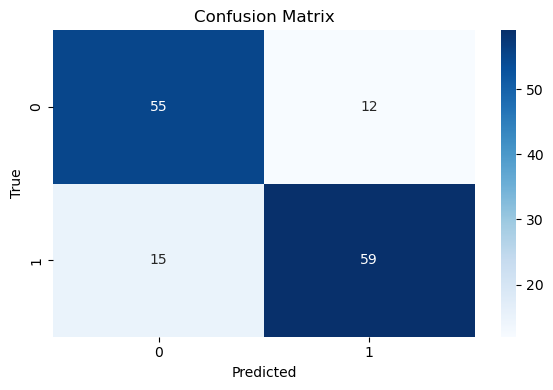

In [233]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       103
           1       0.83      0.79      0.81       108

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211



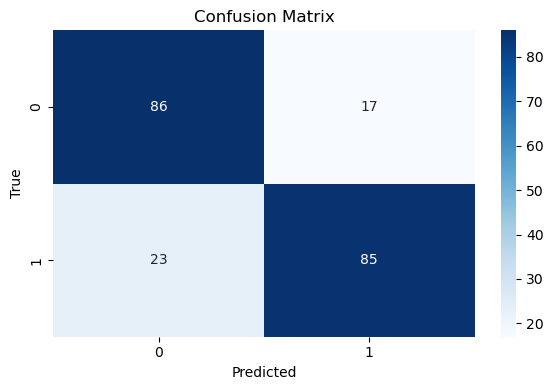

In [235]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       141
           1       0.84      0.80      0.82       140

    accuracy                           0.83       281
   macro avg       0.83      0.83      0.83       281
weighted avg       0.83      0.83      0.83       281



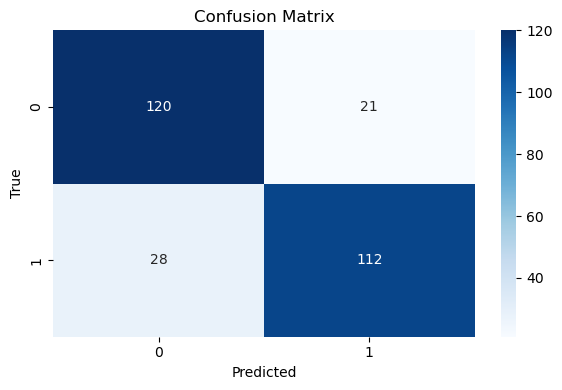

In [237]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Kesimpulan
Model Naive Bayes dengan hyperparameter `var_smoothing` sebesar 0.001 dan rasio train-test 60:40 memberikan akurasi yang baik pada dataset ini. Model ini dapat digunakan untuk prediksi lebih lanjut pada data baru.